<a href="https://colab.research.google.com/github/bhoop70233/machine-learning01/blob/main/KMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.datasets import make_blobs

# specify dataset parameter
n_samples = 300
n_features = 2
centers = 3
cluster_std = 1.0

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)
X = np.interp(X, (X.min(), X.max()), (0, 10))
df=pd.DataFrame(X,columns=['price','quality'])

df.head()

,price,quality
0,0.954334,0.768917
1,0.764134,0.989582
2,3.634980,8.130957
3,6.532129,5.891767
4,0.205599,0.693870


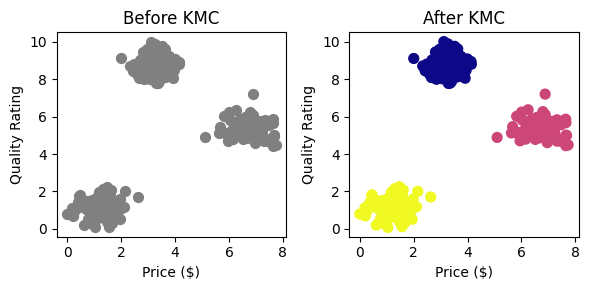

In [21]:
df['cluster_true']=y

#BEFORE CLUSTERING
plt.figure(figsize=(6,3))

plt.subplot(121)
plt.scatter(X[:,0],X[:,1],s=50,color='gray')
plt.xlabel('Price ($)')
plt.ylabel('Quality Rating')
plt.title('Before KMC')

#AFTER CLUSTERING
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='plasma')
plt.xlabel('Price ($)')
plt.ylabel('Quality Rating')
plt.title('After KMC')
plt.tight_layout()
plt.show()

In [22]:
#check for missing values
df.isnull().any()

price           False
quality         False
cluster_true    False
dtype: bool

In [23]:
# data not of the same scale
df.describe()

,price,quality,cluster_true
count,300.000000,300.000000,300.000000
mean,3.680818,5.078316,1.000000
std,2.329198,3.149941,0.817861
min,0.000000,0.080263,0.000000
25%,1.474355,1.441664,0.000000
50%,3.228158,5.376079,1.000000
75%,6.302475,8.369210,2.000000
max,7.733103,10.000000,2.000000


In [24]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[['price','quality']])
df_scaled = pd.DataFrame(scaled_features, columns = ['scaled_price','scaled_quality'])
df_combined=pd.concat([df,df_scaled],axis=1)
df_combined.head()

,price,quality,cluster_true,scaled_price,scaled_quality
0,0.954334,0.768917,2,-1.172523,-1.370375
1,0.764134,0.989582,2,-1.254319,-1.300204
2,3.634980,8.130957,0,-0.019713,0.970730
3,6.532129,5.891767,1,1.226205,0.258675
4,0.205599,0.693870,2,-1.494516,-1.394239


In [25]:
df_combined.shape

(300, 5)

<Axes: ylabel='price'>

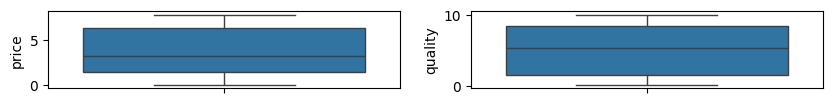

In [26]:
# no outliers
plt.figure(figsize=(10,1))

plt.subplot(122)
sns.boxplot(data=df_combined.quality)
plt.subplot(121)
sns.boxplot(data=df_combined.price)




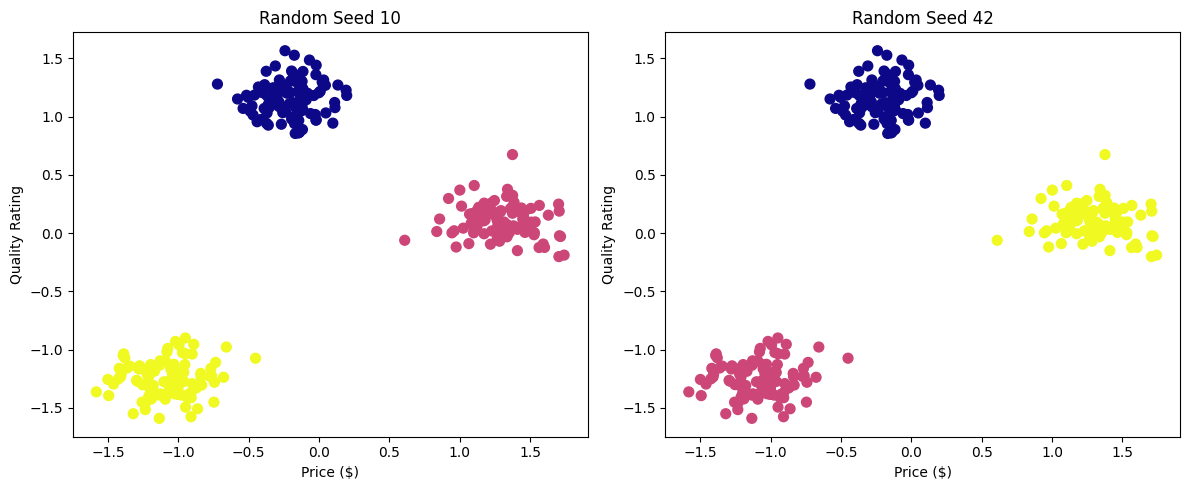

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans_from_scratch:

    def __init__(self, n_clusters, max_iters=300, random_seed=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_seed = random_seed

    def initialize_centroids(self, X):
        np.random.seed(self.random_seed)
        centroids_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        centroids = X[centroids_indices]
        return centroids

    def assign_clusters(self, X, centroids):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, clusters):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[clusters == i], axis=0)
        return centroids

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        clusters = np.zeros(len(X))  # Initialize clusters
        for _ in range(self.max_iters):
            old_centroids = centroids
            clusters = self.assign_clusters(X, centroids)
            centroids = self.update_centroids(X, clusters)
            if np.allclose(old_centroids, centroids):
                break
        self.cluster_centers_ = centroids
        return self

    def predict(self, X):
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)


# Assuming df_combined and X are defined appropriately
random_seeds = [10, 42]
features = ['scaled_price', 'scaled_quality']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, seed in enumerate(random_seeds):
    kmeans_from_scratch = KMeans_from_scratch(n_clusters=3, random_seed=seed)
    kmeans_from_scratch.fit(df_combined[features].values)
    clusters_pred_scratch = kmeans_from_scratch.predict(df_combined[features].values)
    df_combined[f'clusters_pred_scratch_{seed}'] = clusters_pred_scratch

    ax = axes[i]
    ax.scatter(df_combined[features].iloc[:, 0], df_combined[features].iloc[:, 1],
               c=df_combined[f'clusters_pred_scratch_{seed}'], s=50, cmap='plasma')
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Quality Rating')
    ax.set_title(f'Random Seed {seed}')

plt.tight_layout()
plt.show()


Scikit-Learn KMeans¶


In [32]:
from sklearn.cluster import KMeans

KMeans=KMeans(n_clusters=3,random_state=42)
KMeans.fit(df_combined[features])
clusters_pred_sklearn = KMeans.predict(df_combined[features])
df_combined['clusters_pred_sklearn_42'] = clusters_pred_sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


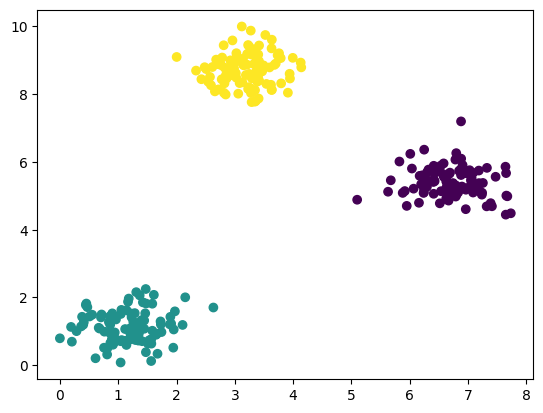

In [33]:
plt.scatter(df_combined.price, df_combined.quality, c=df_combined['clusters_pred_sklearn_42'])

Choosing Optimal Clusters / Evaluating Results

a. Elbow method¶


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

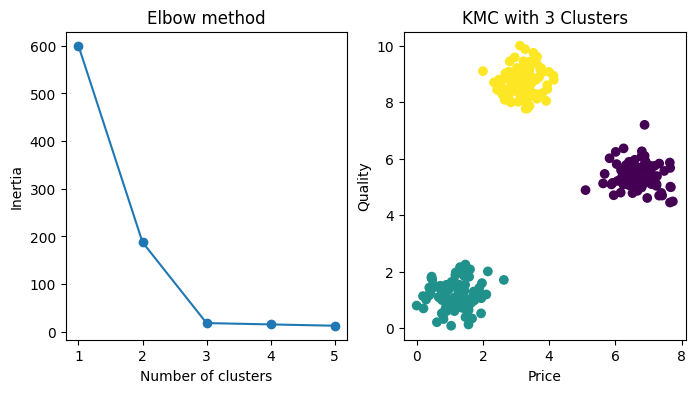

In [35]:
#finding optimal no of clusters
from sklearn.cluster import KMeans

min_clusters=1
max_clusters=5
range_clusters=range(min_clusters,max_clusters+1)

#compute inertia for each value of k
inertia=[]
for k in range_clusters:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_combined[features].values)
    inertia.append(kmeans.inertia_)

# plot elbow curve
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(min_clusters, max_clusters+1, 1.0))
plt.title('Elbow method')

plt.subplot(122)
plt.scatter(df_combined.price, df_combined.quality, c = df_combined['clusters_pred_sklearn_42'])
plt.title('KMC with 3 Clusters')
plt.xlabel('Price')
plt.ylabel('Quality')

plt.show()
